In [1]:
import cv2
import glob
#from google.colab.patches import cv2_imshow
from keras.datasets import mnist
from keras import models
from keras import layers
from PIL import Image, ImageDraw
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils


In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [29]:
## Insert local drive location where all 5 signs are extracted
import os

def path_directory(path):
    path_name = []
    test_purpose = []
    for filename in os.listdir(path):
        if filename == "test_purpose":
            test_purpose.append("test_purpose")
        else:
            path_name.append(filename)
        
    return path_name,test_purpose


path,test_purpose = path_directory('C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/Deep Learning Neural Networks/Project/Data_symbols/extract_necessary')
print(path)
print(test_purpose)

['+', '-', '=', 'division', 'multiplication', 'x', 'y', 'z']
['test_purpose']


In [31]:
def add_symbols(path):
    images = []
    labels = []
    for path in path:
        for img in glob.glob("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/Deep Learning Neural Networks/Project/Data_symbols/extract_necessary/{}/*.jpg".format(path)):
            #images.append(img)
            labels.append(path)
            #np.append(train_images,im_resize)
            img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
            im_resize = cv2.resize(img,(28,28), interpolation=cv2.INTER_AREA)
            im_bw = cv2.bitwise_not(im_resize)
            #dilated_image = cv2.dilate(im_resize, (3, 3))
            im_resize=np.reshape(im_bw,(28,28))
            images.append(im_resize)
    
    return images,labels

images,labels = add_symbols(path)

In [33]:
### dictionary to convert string classes to integer and concatenate the kaggle symbols dataset with mnist dataset

dict1 = {10:'+',11:'-', 12:'=', 13:'division', 14:'multiplication', 15:'x', 16:'y', 17:'z'}

for i in range(len(labels)):
    for j in dict1:
        if labels[i] == dict1[j]:
            labels[i] = j
print(len(labels))
labels_array = np.array(labels)
train_labels = np.concatenate((train_labels,labels_array))
symbols_array = np.array(images)
train_images = np.concatenate((train_images,symbols_array))
print(train_labels.shape)
print(train_images.shape)

30030
(90030,)
(90030, 28, 28)


Please enter an image number50000
Label is 3


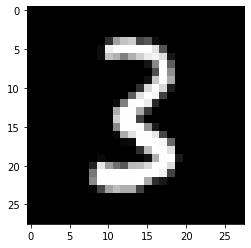

In [34]:
input_image = int(input("Please enter an image number"))
for i in dict1:
    example = train_images[input_image]
    if i == train_labels[input_image]:
        print("label is",dict1[i])
        break
    else: 
        print("Label is",train_labels[input_image])
        break
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
#example = train_images[61000]
    

In [35]:
print ("Shape of X_train: {}".format(train_images.shape))
print ("Shape of y_train: {}".format(train_labels.shape))
print ("Shape of X_test: {}".format(test_images.shape))
print ("Shape of y_test: {}".format(test_labels.shape))

train_images = train_images.reshape(90030, 28, 28, 1)
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Shape of X_train: (90030, 28, 28)
Shape of y_train: (90030,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [36]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(18, activation='softmax'))

    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model    

In [83]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(18, activation='softmax'))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                663570    
Total params: 682,386
Trainable params: 682,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
model=create_model()
model.fit(train_images, train_labels, epochs=2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 18)                663570    
Total params: 682,386
Trainable params: 682,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
2814/2814 [==============================] - 229s 81ms/step - loss: 0.1344 - accuracy: 0.9616
Epoch 2/2
2814/2814 [==============================] - 227s 81ms/step - loss: 0.0423 - accuracy: 0.9879


In [45]:
def add_symbols(test_purpose):
    testing_images = []
    for path in test_purpose:
        for img in glob.glob("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/Deep Learning Neural Networks/Project/Data_symbols/extract_necessary/{}/*.jpg".format(path)):
            equalto = cv2.imread(img, cv2.IMREAD_COLOR)
            gray = cv2.cvtColor(equalto, cv2.COLOR_BGR2GRAY)
            im_resize = cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA)
            changed_colour = cv2.bitwise_not(im_resize)
            changed_colour = np.reshape(changed_colour,(28,28))
            #images.append(changed_colour)
            testing_images.append(changed_colour)
            #np.append(train_images,im_resize)
    return testing_images

test_symbols = add_symbols(test_purpose)

Predicted class is [0]


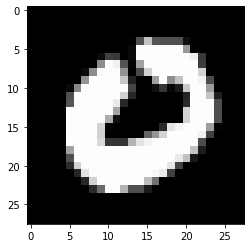

Predicted class is -


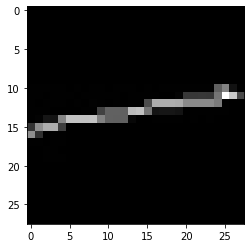

Predicted class is =


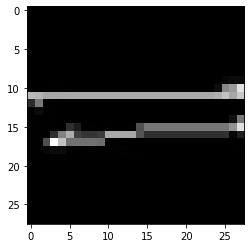

In [80]:
def initial_predict(example):
    prediction = model.predict_classes(example.reshape(1, 28, 28, 1))
    if prediction[0] >= 9:
        for i in dict1:
            if i == prediction[0]:
                print("Predicted class is", dict1[i])
    else:
        print("Predicted class is", prediction)
    plt.imshow(example.reshape(28, 28), cmap="gray")
    plt.show()
    return prediction
init = initial_predict(test_images[25])
predict_symbols = initial_predict(test_symbols[0])
predict_symbols = initial_predict(test_symbols[2])
#dict1 = {10:'+',11:'-', 12:'=', 13:'division', 14:'multiplication', 15:'x', 16:'y', 17:'z'}


i am here


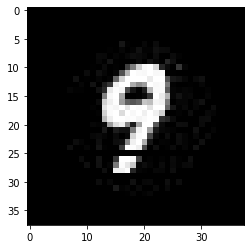

In [125]:
### Final - Final

def cropping(path):
    print('i am here')
    imagem = cv2.imread(path, cv2.IMREAD_COLOR)
    # Convert black pixels to white and white to black
    img = cv2.bitwise_not(imagem)
    # Convert to gray-scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Blur the image to reduce noise
    img_blur = cv2.medianBlur(gray, 5)
    # Find the edges in the image using canny detector
    edges = cv2.Canny(img_blur, 50, 200)
    # Detect points that form a line
    lines = cv2.HoughLinesP(edges, 1, np.pi/180,
                            threshold=100, minLineLength=10, maxLineGap=250)
    # Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), 1)
    cropped = []
    # Apply hough transform on the image
    circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1,
                               img.shape[0]/64, param1=200, param2=10, minRadius=10, maxRadius=20)
    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        sorted_array = circles[0][np.argsort(circles[0][:, 1])]
        for i in sorted_array:
            # Draw outer circle
            cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 0), 10)
            crop_img = img[i[1] - i[2]:i[1] + i[2], i[0] - i[2]:i[0] + i[2], :]
            cropped.append(crop_img)
    return cropped

### Give location of image
cropped_image = cropping('C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/Deep Learning Neural Networks/Project/deep-homework-grader-main/data/homework/train/00059.jpg')

plt.imshow(cropped_image[0],cmap='gray')

In [127]:
def predict(images):
    digits_stored = []
    signs = []
    for i in images:
        im_gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        #(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        thresh = 127
        im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
        dim = (28, 28)
        resized = cv2.resize(im_bw, dim)
        # print(resized.shape)
        imge = np.resize(resized, (28, 28, 1))
        arr = np.array(imge) / 255
        im2arr = arr.reshape(1, 28, 28, 1)
        y_pred = model.predict_classes(im2arr)
        if y_pred > 9:
            for j in dict1:
                if y_pred == j:
                    signs.append(dict1[j])
        digits_stored.append(y_pred)
        print("Predicted class is", y_pred)

    return digits_stored,signs

image_prediction,signs = predict(cropped_image)


Predicted class is [9]
Predicted class is [0]
Predicted class is [3]
Predicted class is [6]


In [128]:
## Matching with existing answer sheet

def matching(image_prediction,standard_array):
    total_marks = 0
    #unmatched = []
    for i in range(len(standard_array)):
        if standard_array[i] == image_prediction[i]:
            print("Your answer is correct for question",i+1,",Your answer is",image_prediction[i])
            total_marks = total_marks + 1
        else:
            print("Your answer is incorrect for question",i+1,"and Your answer is",image_prediction[i],",Expected answer is",standard_array[i])
            
    return total_marks

### Define standard array which contains answers
standard_array = np.array([[5], [3], [0], [6]])
#np.where(standard_array==image_prediction)
#np.intersect1d(image_prediction,standard_array)
match = matching(image_prediction,standard_array)   
print("Total marks =",match)

Your answer is incorrect for question 1 and Your answer is [9] ,Expected answer is [5]
Your answer is incorrect for question 2 and Your answer is [0] ,Expected answer is [3]
Your answer is incorrect for question 3 and Your answer is [3] ,Expected answer is [0]
Your answer is correct for question 4 ,Your answer is [6]
Total marks = 1


In [81]:
# Saving model

#model.save('C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/Deep Learning Neural Networks/Project/model_with_symbols/most_accurate.h5')

In [ ]:
### Partial credits

maxArea = 800
minArea = 100

for fin in fin_crop:
    image = np.array(fin)#, dtype = np.uint8)
    #gray = image[:, :, ::-1].copy().astype(np.uint8)
    Igray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # Igray = gray

    # Threshold
    #ret, Ithresh = cv2.threshold(Igray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    ret, Ithresh = cv2.threshold(Igray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Keep only small components but not to small
    comp = cv2.connectedComponentsWithStats(Ithresh)

    labels = comp[1]
    labelStats = comp[2]
    labelAreas = labelStats[:,4]

    for compLabel in range(1,comp[0],1):
        print(labelAreas[compLabel])

        if labelAreas[compLabel] > maxArea or labelAreas[compLabel] < minArea:
            labels[labels==compLabel] = 0

    labels[labels>0] =  1

    # Do dilation
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
    IdilateText = cv2.morphologyEx(labels.astype(np.uint8),cv2.MORPH_DILATE,se)

    # Find connected component again
    comp = cv2.connectedComponentsWithStats(IdilateText)

    # Draw a rectangle around the text
    labels = comp[1]
    labelStats = comp[2]

    for compLabel in range(1,comp[0],1):
        print('i am here')
        cv2.rectangle(Igray,(labelStats[compLabel,0],labelStats[compLabel,1]),(labelStats[compLabel,0]+labelStats[compLabel,2],labelStats[compLabel,1]+labelStats[compLabel,3]),(0,0,255),2)
    plt.imshow(Igray)
    plt.show()

    break